In [62]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import math

In [63]:
n = 100
teta = 13
eps = 0.05
x = np.random.uniform(teta,2*teta,n)
x = x.round(2)

# F-H Доверительные интервалы

## Точный Д.И.

In [64]:
a1_acc, a2_acc =  x.max()/(1 + (1-eps)**(1/n)), x.max()/(1+eps**(1/n))
(a1_acc, a2_acc)

(12.96832508773577, 13.159183822470363)

## Асимптотический(ОММ) Д.И.

In [65]:
a1_as, a2_as = ( 2/3*x.mean() - 1.3*((x**2).mean() - x.mean()**2)**(0.5)/(n**0.5),
                 2/3*x.mean() + 1.3*((x**2).mean() - x.mean()**2)**(0.5)/(n**0.5) )
(a1_as, a2_as)

(12.843348590203119, 13.744784743130213)

## Bootstrap

In [66]:
delta = np.array([])
teta_ = 2/3*x.mean()
for i in range(0,1000):
    bootstrap = np.random.choice(x, size=x.shape[0]).round(2) 
    delta = np.append(delta, 2/3*bootstrap.mean() - teta_)
    
delta.sort() 
a1_b, a2_b = teta_ - delta[974], teta_ - delta[24]
(a1_b, a2_b)

(12.862866666666662, 13.764133333333332)

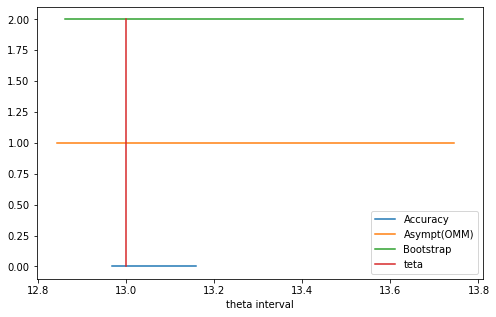

In [67]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot([a1_acc, a2_acc], [0, 0], label = 'Accuracy')
ax.plot([a1_as, a2_as], [1, 1], label = 'Asympt(OMM)')
ax.plot([a1_b, a2_b], [2, 2], label = 'Bootstrap')
ax.plot([teta, teta], [0, 2], label = 'teta')

ax.set_xlabel('theta interval')
ax.legend(loc = 'best')